In [1]:
#import packages
import re
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

In [2]:
df=pd.read_csv('3-8_ELA_AND_MATH_RESEARCHER_FILE_2016.csv')

In [3]:
df.head() #Let's get a picture of what this looks like out of the box.

,SY_END_DATE,NRC_CODE,NRC_DESC,COUNTY_CODE,COUNTY_DESC,BEDSCODE,NAME,ITEM_SUBJECT_AREA,ITEM_DESC,SUBGROUP_CODE,...,L1_PCT,L2_COUNT,L2_PCT,L3_COUNT,L3_PCT,L4_COUNT,L4_PCT,L2-L4_PCT,L3-L4_PCT,MEAN_SCALE_SCORE
0,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,1,...,27%,53393,31%,59060,35%,12330,7%,73%,42%,309
1,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,2,...,22%,25863,31%,31514,37%,7826,9%,78%,47%,314
2,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,3,...,31%,27530,32%,27546,32%,4504,5%,69%,37%,305
3,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,4,...,31%,419,34%,363,29%,64,5%,69%,35%,304
4,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,5,...,36%,10466,33%,8588,27%,1351,4%,64%,31%,300


Okay, kinda messy. Looks like we're gonna need to trim percents again, and it also looks like we need to call the columns list by itself to know all of what we need to trim since some of them got eaten by the ellipsis.

In [4]:
df.columns

Index(['SY_END_DATE', 'NRC_CODE', 'NRC_DESC', 'COUNTY_CODE', 'COUNTY_DESC',
       'BEDSCODE', 'NAME', 'ITEM_SUBJECT_AREA', 'ITEM_DESC', 'SUBGROUP_CODE',
       'SUBGROUP_NAME', 'TOTAL_TESTED', 'L1_COUNT', 'L1_PCT', 'L2_COUNT',
       'L2_PCT', 'L3_COUNT', 'L3_PCT', 'L4_COUNT', 'L4_PCT', 'L2-L4_PCT',
       'L3-L4_PCT', 'MEAN_SCALE_SCORE'],
      dtype='object')

In [5]:
%%time
pct_columns=['L1_PCT','L2_PCT','L3_PCT','L4_PCT','L2-L4_PCT','L3-L4_PCT']
#Now we adapt Carleton's little gift from Part 2
for col in pct_columns:
    df[col].replace(re.compile(r'%'),'',inplace=True,regex=True)
    print(col+' trimmed')
    df[col].replace(re.compile(r'-'),np.nan,inplace=True,regex=True)
    print('All '+col+' NaNs added')
    df[col]=df[col].astype(np.float)
    print(col+' converted')

L1_PCT trimmed
All L1_PCT NaNs added
L1_PCT converted
L2_PCT trimmed
All L2_PCT NaNs added
L2_PCT converted
L3_PCT trimmed
All L3_PCT NaNs added
L3_PCT converted
L4_PCT trimmed
All L4_PCT NaNs added
L4_PCT converted
L2-L4_PCT trimmed
All L2-L4_PCT NaNs added
L2-L4_PCT converted
L3-L4_PCT trimmed
All L3-L4_PCT NaNs added
L3-L4_PCT converted
CPU times: user 2.58 s, sys: 168 ms, total: 2.74 s
Wall time: 2.73 s


In [6]:
import os
os.system('say "Percentage trimming and float conversion complete"')

0

In [7]:
df.isnull().sum() #Checking to see if the -s were properly replaced with NaNs

SY_END_DATE               0
NRC_CODE              11996
NRC_DESC              11996
COUNTY_CODE            1611
COUNTY_DESC            1611
BEDSCODE                  0
NAME                      0
ITEM_SUBJECT_AREA         0
ITEM_DESC                 0
SUBGROUP_CODE             0
SUBGROUP_NAME             0
TOTAL_TESTED              0
L1_COUNT                  0
L1_PCT               124763
L2_COUNT                  0
L2_PCT               124763
L3_COUNT                  0
L3_PCT               124763
L4_COUNT                  0
L4_PCT               124763
L2-L4_PCT            124763
L3-L4_PCT            124763
MEAN_SCALE_SCORE          0
dtype: int64

In [8]:
df.shape #Making sure we didn't accidentally replace the whole columns with NaNs as happened in previous attempts

(436464, 23)

In [9]:
df.head()

,SY_END_DATE,NRC_CODE,NRC_DESC,COUNTY_CODE,COUNTY_DESC,BEDSCODE,NAME,ITEM_SUBJECT_AREA,ITEM_DESC,SUBGROUP_CODE,...,L1_PCT,L2_COUNT,L2_PCT,L3_COUNT,L3_PCT,L4_COUNT,L4_PCT,L2-L4_PCT,L3-L4_PCT,MEAN_SCALE_SCORE
0,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,1,...,27.0,53393,31.0,59060,35.0,12330,7.0,73.0,42.0,309
1,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,2,...,22.0,25863,31.0,31514,37.0,7826,9.0,78.0,47.0,314
2,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,3,...,31.0,27530,32.0,27546,32.0,4504,5.0,69.0,37.0,305
3,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,4,...,31.0,419,34.0,363,29.0,64,5.0,69.0,35.0,304
4,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,5,...,36.0,10466,33.0,8588,27.0,1351,4.0,64.0,31.0,300


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436464 entries, 0 to 436463
Data columns (total 23 columns):
SY_END_DATE          436464 non-null object
NRC_CODE             424468 non-null float64
NRC_DESC             424468 non-null object
COUNTY_CODE          434853 non-null float64
COUNTY_DESC          434853 non-null object
BEDSCODE             436464 non-null int64
NAME                 436464 non-null object
ITEM_SUBJECT_AREA    436464 non-null object
ITEM_DESC            436464 non-null object
SUBGROUP_CODE        436464 non-null int64
SUBGROUP_NAME        436464 non-null object
TOTAL_TESTED         436464 non-null object
L1_COUNT             436464 non-null object
L1_PCT               311701 non-null float64
L2_COUNT             436464 non-null object
L2_PCT               311701 non-null float64
L3_COUNT             436464 non-null object
L3_PCT               311701 non-null float64
L4_COUNT             436464 non-null object
L4_PCT               311701 non-null float64
L2-L4

Looks like there are some other columns we need to convert to numerical data types. (As you can see from the column list name, I didn't fully think through what types to use at first, but it all shook out okay in the end.)

In [11]:
%%time
cols_to_int=['TOTAL_TESTED','L1_COUNT','L2_COUNT','L3_COUNT','L4_COUNT','MEAN_SCALE_SCORE']
for col in cols_to_int:
    df[col].replace(re.compile(r'-'),np.nan,inplace=True,regex=True)
    print('All '+col+' NaNs added')
    df[col]=df[col].astype(np.float)
    print(col+' converted')

All TOTAL_TESTED NaNs added
TOTAL_TESTED converted
All L1_COUNT NaNs added
L1_COUNT converted
All L2_COUNT NaNs added
L2_COUNT converted
All L3_COUNT NaNs added
L3_COUNT converted
All L4_COUNT NaNs added
L4_COUNT converted
All MEAN_SCALE_SCORE NaNs added
MEAN_SCALE_SCORE converted
CPU times: user 1.26 s, sys: 99.3 ms, total: 1.36 s
Wall time: 1.35 s


In [12]:
os.system('say "Count conversion complete"')

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436464 entries, 0 to 436463
Data columns (total 23 columns):
SY_END_DATE          436464 non-null object
NRC_CODE             424468 non-null float64
NRC_DESC             424468 non-null object
COUNTY_CODE          434853 non-null float64
COUNTY_DESC          434853 non-null object
BEDSCODE             436464 non-null int64
NAME                 436464 non-null object
ITEM_SUBJECT_AREA    436464 non-null object
ITEM_DESC            436464 non-null object
SUBGROUP_CODE        436464 non-null int64
SUBGROUP_NAME        436464 non-null object
TOTAL_TESTED         313857 non-null float64
L1_COUNT             311701 non-null float64
L1_PCT               311701 non-null float64
L2_COUNT             311701 non-null float64
L2_PCT               311701 non-null float64
L3_COUNT             311701 non-null float64
L3_PCT               311701 non-null float64
L4_COUNT             311701 non-null float64
L4_PCT               311701 non-null float64


In [14]:
df.head()

,SY_END_DATE,NRC_CODE,NRC_DESC,COUNTY_CODE,COUNTY_DESC,BEDSCODE,NAME,ITEM_SUBJECT_AREA,ITEM_DESC,SUBGROUP_CODE,...,L1_PCT,L2_COUNT,L2_PCT,L3_COUNT,L3_PCT,L4_COUNT,L4_PCT,L2-L4_PCT,L3-L4_PCT,MEAN_SCALE_SCORE
0,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,1,...,27.0,53393.0,31.0,59060.0,35.0,12330.0,7.0,73.0,42.0,309.0
1,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,2,...,22.0,25863.0,31.0,31514.0,37.0,7826.0,9.0,78.0,47.0,314.0
2,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,3,...,31.0,27530.0,32.0,27546.0,32.0,4504.0,5.0,69.0,37.0,305.0
3,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,4,...,31.0,419.0,34.0,363.0,29.0,64.0,5.0,69.0,35.0,304.0
4,06/30/2016,NaN,NaN,NaN,NaN,0,STATEWIDE - ALL DISTRICTS AND CHARTERS,ELA,Grade 3 ELA,5,...,36.0,10466.0,33.0,8588.0,27.0,1351.0,4.0,64.0,31.0,300.0


I wondered what was the deal with all those columns that were just NaNs in the head, so I decided to take a closer look at them.

In [15]:
oddcols=['NRC_CODE','NRC_DESC','COUNTY_CODE','COUNTY_DESC']
for col in df[oddcols]:
    print(df[col].unique())
    print(df[col].isnull().sum())

[ nan   1.   2.   3.   4.   5.   6.   7.]
11996
[nan 'NYC' 'Buffalo, Rochester, Yonkers, Syracuse'
 'Urban-Suburban High Needs' 'Rural High Needs' 'Average Needs' 'Low Needs'
 'Charters']
11996
[ nan   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  31.
  32.  33.  34.  35.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.
  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.]
1611
[nan 'ALBANY' 'ALLEGANY' 'BROOME' 'CATTARAUGUS' 'CAYUGA' 'CHAUTAUQUA'
 'CHEMUNG' 'CHENANGO' 'CLINTON' 'COLUMBIA' 'CORTLAND' 'DELAWARE' 'DUTCHESS'
 'ERIE' 'ESSEX' 'FRANKLIN' 'FULTON' 'GENESEE' 'GREENE' 'HAMILTON'
 'HERKIMER' 'JEFFERSON' 'LEWIS' 'LIVINGSTON' 'MADISON' 'MONROE'
 'MONTGOMERY' 'NASSAU' 'NEW YORK' 'BRONX' 'KINGS' 'QUEENS' 'RICHMOND'
 'NIAGARA' 'ONEIDA' 'ONONDAGA' 'ONTARIO' 'ORANGE' 'ORLEANS' 'OSWEGO'
 'OTSEGO' 'PUTNAM' 'RENSSELAER' 'ROCKLAND' 'SAINT LAWRENCE' 'SARA

And this was when I realized I'd forgotten the data was for the entire state of New York, not just NYC. Silly me. And lucky me, that I didn't impute NaNs based on a mean that would come to be totally insignificant. I needed to figure out what indices I should subset the dataframe on to include only counties contained within the five boroughs.

In [16]:
%%time
nyc_counties=['NEW YORK','BRONX','KINGS','QUEENS','RICHMOND']
county_start_index=[0,0,0,0,0]
county_counts=[0,0,0,0,0]
county_been_seen=[0,0,0,0,0]
for i in range(df.shape[0]):
    for j in range(5):
        if df['COUNTY_DESC'][i]==nyc_counties[j]:
            if county_been_seen[j]==0:
                county_start_index[j]=i
                print(nyc_counties[j]+' first appears at '+str(i))
                county_been_seen[j]=1
            county_counts[j]+=1

NEW YORK first appears at 147366
BRONX first appears at 171751
KINGS first appears at 200385
QUEENS first appears at 242230
RICHMOND first appears at 270235
CPU times: user 24.1 s, sys: 44.6 ms, total: 24.1 s
Wall time: 24.1 s


In [17]:
os.system('say "County tally complete"')

0

In [18]:
county_counts

[24385, 28634, 41845, 28005, 5898]

In [19]:
county_start_index

[147366, 171751, 200385, 242230, 270235]

In [20]:
county_end_index=[0,0,0,0,0]
for k in range(5):
    county_end_index[k]=county_start_index[k]+county_counts[k]
county_end_index

[171751, 200385, 242230, 270235, 276133]

In [21]:
df['COUNTY_DESC'][276133] #seeing if I need to trim at or after this index

'NIAGARA'

Makes sense they'd all be one after the other, right? So I need to subset only [147366:276133] for my NYC dataframe.

In [22]:
nyc_df=df[:][147366:276133].copy()
nyc_df.reset_index(inplace=True)

In [23]:
nyc_df['COUNTY_DESC'].unique()

array(['NEW YORK', 'BRONX', 'KINGS', 'QUEENS', 'RICHMOND'], dtype=object)

In [24]:
os.system('say "Subset county check complete"')

0

In [25]:
nyc_df.head()

,index,SY_END_DATE,NRC_CODE,NRC_DESC,COUNTY_CODE,COUNTY_DESC,BEDSCODE,NAME,ITEM_SUBJECT_AREA,ITEM_DESC,...,L1_PCT,L2_COUNT,L2_PCT,L3_COUNT,L3_PCT,L4_COUNT,L4_PCT,L2-L4_PCT,L3-L4_PCT,MEAN_SCALE_SCORE
0,147366,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,21.0,2798.0,27.0,4154.0,40.0,1296.0,12.0,79.0,52.0,317.0
1,147367,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,17.0,1330.0,26.0,2174.0,42.0,827.0,16.0,83.0,58.0,322.0
2,147368,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,26.0,1468.0,28.0,1980.0,38.0,469.0,9.0,74.0,47.0,312.0
3,147369,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,33.0,22.0,30.0,25.0,34.0,2.0,3.0,67.0,37.0,302.0
4,147370,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,26.0,691.0,31.0,832.0,37.0,139.0,6.0,74.0,43.0,310.0


Okay, that worked. It might be useful later on to have a little dataframe with the state rates and stuff to compare against, so let's take a brief detour and whip that up.

In [26]:
#The state values are at the top (i.e. starts at index 0) so we only need to know how many state rows there are.
df['NAME'].value_counts()

SCHOOL 5                                              372
PARK AVENUE SCHOOL                                    340
JOHN F KENNEDY SCHOOL                                 315
JOHN F KENNEDY MIDDLE SCHOOL                          309
EAST MIDDLE SCHOOL                                    290
PS 89                                                 266
WEST MIDDLE SCHOOL                                    249
JEFFERSON ELEMENTARY SCHOOL                           248
IROQUOIS MIDDLE SCHOOL                                246
PS 212                                                244
GEORGE WASHINGTON SCHOOL                              238
PS 150                                                206
STATEWIDE - ALL DISTRICTS AND CHARTERS                204
CHAUTAUQUA COUNTY                                     204
ORANGE COUNTY                                         204
ONONDAGA COUNTY                                       204
NRC - BUFFALO, ROCHESTER, YONKERS, SYRACUSE           204
OSWEGO COUNTY 

Okay, we see above that STATEWIDE - ALL DISTRICTS AND CHARTERS has 204 rows, which is more than I was expecting, but at least we know the subset indices now. Let's do it.

In [27]:
state_df=df[:][:204].copy()
state_df.describe()

,NRC_CODE,COUNTY_CODE,BEDSCODE,SUBGROUP_CODE,TOTAL_TESTED,L1_COUNT,L1_PCT,L2_COUNT,L2_PCT,L3_COUNT,L3_PCT,L4_COUNT,L4_PCT,L2-L4_PCT,L3-L4_PCT,MEAN_SCALE_SCORE
count,0.0,0.0,204.0,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,NaN,NaN,0.0,9.235294,62385.990196,18040.544118,34.661765,20342.068627,31.465686,14794.362745,20.794118,9209.014706,13.044118,65.338235,33.882353,298.495098
std,NaN,NaN,0.0,5.231915,52516.240409,14566.460020,16.701916,17604.593260,5.277875,14202.778265,8.608437,9721.014802,9.265807,16.701916,15.852332,16.243376
min,NaN,NaN,0.0,1.000000,70.000000,34.000000,10.000000,18.000000,13.000000,2.000000,1.000000,0.000000,0.000000,15.000000,1.000000,255.000000
25%,NaN,NaN,0.0,5.000000,16961.000000,7715.500000,23.000000,4176.750000,29.000000,1571.500000,16.000000,694.000000,6.000000,58.000000,23.000000,291.000000
50%,NaN,NaN,0.0,9.000000,56249.000000,15136.000000,31.000000,17572.000000,31.000000,13372.500000,22.000000,6132.000000,12.000000,69.000000,35.500000,302.000000
75%,NaN,NaN,0.0,13.000000,93243.000000,27821.000000,42.000000,33940.000000,35.000000,20785.250000,26.000000,16004.750000,18.250000,77.000000,45.000000,309.000000
max,NaN,NaN,0.0,18.000000,170666.000000,57080.000000,85.000000,58224.000000,42.000000,59060.000000,46.000000,37540.000000,48.000000,90.000000,70.000000,332.000000


In [28]:
os.system('say "State subframe complete"')

0

In [29]:
nyc_df.head(16)

,index,SY_END_DATE,NRC_CODE,NRC_DESC,COUNTY_CODE,COUNTY_DESC,BEDSCODE,NAME,ITEM_SUBJECT_AREA,ITEM_DESC,...,L1_PCT,L2_COUNT,L2_PCT,L3_COUNT,L3_PCT,L4_COUNT,L4_PCT,L2-L4_PCT,L3-L4_PCT,MEAN_SCALE_SCORE
0,147366,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,21.0,2798.0,27.0,4154.0,40.0,1296.0,12.0,79.0,52.0,317.0
1,147367,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,17.0,1330.0,26.0,2174.0,42.0,827.0,16.0,83.0,58.0,322.0
2,147368,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,26.0,1468.0,28.0,1980.0,38.0,469.0,9.0,74.0,47.0,312.0
3,147369,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,33.0,22.0,30.0,25.0,34.0,2.0,3.0,67.0,37.0,302.0
4,147370,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,26.0,691.0,31.0,832.0,37.0,139.0,6.0,74.0,43.0,310.0
5,147371,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,31.0,1442.0,33.0,1395.0,32.0,224.0,5.0,69.0,37.0,305.0
6,147372,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,9.0,255.0,19.0,629.0,48.0,308.0,23.0,91.0,71.0,333.0
7,147373,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,6.0,350.0,16.0,1135.0,53.0,546.0,25.0,94.0,78.0,337.0
8,147374,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,6.0,38.0,14.0,138.0,51.0,77.0,29.0,94.0,80.0,339.0
9,147375,06/30/2016,NaN,NaN,31.0,NEW YORK,310000000000,NEW YORK COUNTY,ELA,Grade 3 ELA,...,14.0,2205.0,26.0,3757.0,45.0,1248.0,15.0,86.0,60.0,324.0


In [30]:
nyc_df.columns

Index(['index', 'SY_END_DATE', 'NRC_CODE', 'NRC_DESC', 'COUNTY_CODE',
       'COUNTY_DESC', 'BEDSCODE', 'NAME', 'ITEM_SUBJECT_AREA', 'ITEM_DESC',
       'SUBGROUP_CODE', 'SUBGROUP_NAME', 'TOTAL_TESTED', 'L1_COUNT', 'L1_PCT',
       'L2_COUNT', 'L2_PCT', 'L3_COUNT', 'L3_PCT', 'L4_COUNT', 'L4_PCT',
       'L2-L4_PCT', 'L3-L4_PCT', 'MEAN_SCALE_SCORE'],
      dtype='object')

In [31]:
nyc_df['MEAN_SCALE_SCORE']

0         317.0
1         322.0
2         312.0
3         302.0
4         310.0
5         305.0
6         333.0
7         337.0
8         339.0
9         324.0
10        288.0
11        321.0
12        282.0
13        307.0
14        333.0
15        317.0
16        316.0
17        317.0
18        315.0
19        297.0
20        308.0
21        301.0
22        341.0
23        338.0
24        343.0
25        324.0
26        287.0
27        320.0
28        285.0
29        305.0
          ...  
128737    307.0
128738    310.0
128739    309.0
128740    315.0
128741    301.0
128742    312.0
128743    303.0
128744      NaN
128745      NaN
128746    312.0
128747    287.0
128748    311.0
128749    274.0
128750    307.0
128751    323.0
128752    309.0
128753    315.0
128754    316.0
128755    314.0
128756    315.0
128757    312.0
128758      NaN
128759      NaN
128760    318.0
128761    299.0
128762    317.0
128763    294.0
128764    314.0
128765    326.0
128766    315.0
Name: MEAN_SCALE_SCORE, 

Let's take a closer look at the ITEM_SUBJECT_AREA and ITEM_DESC columns (and also SUBGROUP_NAME, just in case). These seem like the kind of things we might like to have in a more machine-readable format (i.e., dummified). Let's start by seeing what the unique values in each are.

In [32]:
nyc_df['ITEM_SUBJECT_AREA'].unique()

array(['ELA', 'Mathematics'], dtype=object)

In [33]:
state_df['ITEM_SUBJECT_AREA'].unique()

array(['ELA', 'Mathematics'], dtype=object)

In [34]:
nyc_df['ITEM_DESC'].unique()

array(['Grade 3 ELA', 'Grade 3 Math', 'Grade 4 ELA', 'Grade 4 Math',
       'Grade 5 ELA', 'Grade 5 Math', 'Grade 6 ELA', 'Grade 6 Math',
       'Grade 7 ELA', 'Grade 7 Math', 'Grade 8 ELA', 'Grade 8 Math'], dtype=object)

In [35]:
state_df['ITEM_DESC'].unique()

array(['Grade 3 ELA', 'Grade 3 Math', 'Grade 4 ELA', 'Grade 4 Math',
       'Grade 5 ELA', 'Grade 5 Math', 'Grade 6 ELA', 'Grade 6 Math',
       'Grade 7 ELA', 'Grade 7 Math', 'Grade 8 ELA', 'Grade 8 Math'], dtype=object)

In [36]:
nyc_df['SUBGROUP_NAME'].unique()

array(['All Students', 'Female', 'Male',
       'American Indian or Alaska Native', 'Black or African American',
       'Hispanic or Latino', 'Asian or Pacific Islander', 'White',
       'Multiracial', 'General Education Students',
       'Students with Disabilities', 'Not Limited English Proficient',
       'Limited English Proficient', 'Economically Disadvantaged',
       'Not Economically Disadvantaged', 'Not Migrant'], dtype=object)

In [37]:
nyc_df['SUBGROUP_NAME']

0                             All Students
1                                   Female
2                                     Male
3         American Indian or Alaska Native
4                Black or African American
5                       Hispanic or Latino
6                Asian or Pacific Islander
7                                    White
8                              Multiracial
9               General Education Students
10              Students with Disabilities
11          Not Limited English Proficient
12              Limited English Proficient
13              Economically Disadvantaged
14          Not Economically Disadvantaged
15                             Not Migrant
16                            All Students
17                                  Female
18                                    Male
19        American Indian or Alaska Native
20               Black or African American
21                      Hispanic or Latino
22               Asian or Pacific Islander
23         

In [38]:
nyc_df['SUBGROUP_CODE'].unique() #this may cause us to not have to dummy this

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 18])

In [39]:
len(nyc_df['SUBGROUP_NAME'].unique())

16

In [40]:
len(nyc_df['SUBGROUP_CODE'].unique())

16

Okay, I think we can get away with leaving the subgroup name be for now, as it looks like there is a unique code per group name. Let's get on with making dummies of the other two.

In [41]:
nyc_subjects=pd.get_dummies(nyc_df['ITEM_SUBJECT_AREA'])
nyc_classes=pd.get_dummies(nyc_df['ITEM_DESC'])
nyc_df=pd.concat([nyc_df,nyc_subjects,nyc_classes],axis=1)

In [42]:
state_subjects=pd.get_dummies(state_df['ITEM_SUBJECT_AREA'])
state_classes=pd.get_dummies(state_df['ITEM_DESC'])
state_df=pd.concat([state_df,state_subjects,state_classes],axis=1)

In [43]:
os.system('say "dummies created and appended"')

0

In [44]:
#A top level survey of what we have here for schools
nyc_df['NAME'].value_counts()

PS 89                                               266
PS 212                                              244
PS 150                                              206
NEW YORK CITY GEOGRAPHIC DISTRICT # 8               192
BRONX COUNTY                                        192
NEW YORK CITY GEOGRAPHIC DISTRICT #13               192
NEW YORK CITY GEOGRAPHIC DISTRICT #17               192
NEW YORK CITY GEOGRAPHIC DISTRICT # 5               192
NEW YORK CITY GEOGRAPHIC DISTRICT #24               192
NEW YORK CITY GEOGRAPHIC DISTRICT # 3               192
RICHMOND COUNTY                                     192
NEW YORK CITY GEOGRAPHIC DISTRICT #31               192
NEW YORK CITY GEOGRAPHIC DISTRICT #21               192
NEW YORK CITY GEOGRAPHIC DISTRICT #20               192
NEW YORK CITY GEOGRAPHIC DISTRICT #26               192
NEW YORK CITY GEOGRAPHIC DISTRICT #29               192
NEW YORK CITY GEOGRAPHIC DISTRICT #25               192
NEW YORK CITY GEOGRAPHIC DISTRICT #28           

Okay. So. We can see here that this dataframe contains three classes of rows: by county, by geographic district, and by school. This is the same base dataset bucketed three different ways, which will mess with the statistics, so we should work on separating them. Let's do the by-county rows first.

In [45]:
nyc_counties_full=[0,0,0,0,0]
nyc_counties_index=[0,0,0,0,0]
nyc_counties_count=[0,0,0,0,0]
nyc_counties_enddex=[0,0,0,0,0]
nyc_counties_beenseen=[0,0,0,0,0]
for i in range(5): 
    nyc_counties_full[i]=nyc_counties[i]+' COUNTY'

In [46]:
%%time
for j in range(nyc_df.shape[0]):
    for k in range(5):
        if nyc_df['NAME'][j]==nyc_counties_full[k]:
            if nyc_counties_beenseen[k]==0:
                nyc_counties_index[k]=j
                nyc_counties_beenseen[k]=1
            nyc_counties_count[k]+=1
for q in range(5):
    nyc_counties_enddex[q]=nyc_counties_index[q]+nyc_counties_count[q]

CPU times: user 7.42 s, sys: 19.9 ms, total: 7.44 s
Wall time: 7.45 s


In [47]:
nyc_counties_index

[0, 24385, 53019, 94864, 122869]

In [48]:
nyc_counties_enddex

[192, 24577, 53211, 95056, 123061]

Okay, now we have got the indices to make the by-county subframe. Let's do that.

In [49]:
nyc_counties_subframe=pd.concat([nyc_df[:][0:192],nyc_df[:][24385:24577],nyc_df[:][53019:53211],
                                nyc_df[:][94864:95056],nyc_df[:][122869:123061]])
nyc_counties_subframe.reset_index(inplace=True)

In [50]:
os.system('say "county subframe complete"')

0

Now I have to figure out how to intelligently/adaptively select all the GEOGRAPHIC DISTRICT rows

In [51]:
geodist='NEW YORK CITY GEOGRAPHIC DISTRICT'

In [52]:
unique_names=nyc_df['NAME'].unique()

In [53]:
unique_districts=[name for name in unique_names if geodist in name]

In [54]:
unique_districts

['NEW YORK CITY GEOGRAPHIC DISTRICT # 1',
 'NEW YORK CITY GEOGRAPHIC DISTRICT # 2',
 'NEW YORK CITY GEOGRAPHIC DISTRICT # 3',
 'NEW YORK CITY GEOGRAPHIC DISTRICT # 4',
 'NEW YORK CITY GEOGRAPHIC DISTRICT # 5',
 'NEW YORK CITY GEOGRAPHIC DISTRICT # 6',
 'NEW YORK CITY GEOGRAPHIC DISTRICT # 7',
 'NEW YORK CITY GEOGRAPHIC DISTRICT # 8',
 'NEW YORK CITY GEOGRAPHIC DISTRICT # 9',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #10',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #11',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #12',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #13',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #14',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #15',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #16',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #17',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #18',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #19',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #20',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #21',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #22',
 'NEW YORK CITY GEOGRAPHIC DISTRICT #23',
 'NEW YORK CITY GEOGRAPHIC DISTRIC

In [55]:
len(unique_districts)

32

In [56]:
nyc_districts_index=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
nyc_districts_count=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
nyc_districts_enddex=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
nyc_districts_beenseen=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [57]:
%%time
for j in range(nyc_df.shape[0]):
    for k in range(32):
        if nyc_df['NAME'][j]==unique_districts[k]:
            if nyc_districts_beenseen[k]==0:
                nyc_districts_index[k]=j
                nyc_districts_beenseen[k]=1
            nyc_districts_count[k]+=1
for q in range(32):
    nyc_districts_enddex[q]=nyc_districts_index[q]+nyc_districts_count[q]

CPU times: user 44.8 s, sys: 59.4 ms, total: 44.9 s
Wall time: 44.9 s


In [58]:
print(nyc_districts_index)

[192, 3211, 8127, 12478, 16401, 20255, 24577, 28187, 32183, 37819, 43756, 49192, 53211, 56841, 60048, 63794, 66734, 71181, 73896, 77982, 81979, 85608, 89120, 92548, 95056, 99072, 102555, 105200, 110680, 114268, 118395, 123061]


In [59]:
print(nyc_districts_enddex)

[384, 3403, 8319, 12670, 16593, 20447, 24765, 28379, 32375, 38011, 43948, 49380, 53403, 57033, 60240, 63982, 66926, 71371, 74086, 78174, 82171, 85800, 89311, 92738, 95248, 99264, 102747, 105392, 110872, 114460, 118587, 123253]


In [60]:
nyc_districts_df=nyc_df[:][192:384]

In [61]:
for i in range(1,32):
    nyc_districts_df=pd.concat([nyc_districts_df,nyc_df[:][nyc_districts_index[i]:nyc_districts_enddex[i]]])

In [62]:
os.system('say "geo districts subframe complete"')

0

Okay, next step is to figure out where and how to slice for the third dataframe. Could get ugly, and likely will.

In [63]:
print(nyc_counties_index,nyc_counties_enddex) #a refresher

[0, 24385, 53019, 94864, 122869] [192, 24577, 53211, 95056, 123061]


That's neat. Looks like the rows for the counties entries are all adjacent to some of the district rows. That should make figuring out the ranges to slice around quite easy. 

In [64]:
nyc_not_sd_index=nyc_districts_index.copy()

In [65]:
counties_indicator=0
for i in range(5):
    for j in range(32):
        if nyc_districts_index[j]==nyc_counties_enddex[i]:
            nyc_not_sd_index[j]=nyc_counties_index[i]

In [66]:
print(nyc_districts_index)

[192, 3211, 8127, 12478, 16401, 20255, 24577, 28187, 32183, 37819, 43756, 49192, 53211, 56841, 60048, 63794, 66734, 71181, 73896, 77982, 81979, 85608, 89120, 92548, 95056, 99072, 102555, 105200, 110680, 114268, 118395, 123061]


In [67]:
print(nyc_not_sd_index)

[0, 3211, 8127, 12478, 16401, 20255, 24385, 28187, 32183, 37819, 43756, 49192, 53019, 56841, 60048, 63794, 66734, 71181, 73896, 77982, 81979, 85608, 89120, 92548, 94864, 99072, 102555, 105200, 110680, 114268, 118395, 122869]


In [68]:
print(nyc_districts_enddex)

[384, 3403, 8319, 12670, 16593, 20447, 24765, 28379, 32375, 38011, 43948, 49380, 53403, 57033, 60240, 63982, 66926, 71371, 74086, 78174, 82171, 85800, 89311, 92738, 95248, 99264, 102747, 105392, 110872, 114460, 118587, 123253]


In [69]:
nyc_others_df=nyc_df[:][nyc_districts_enddex[0]:nyc_not_sd_index[1]]
for i in range(1,31):
    nyc_others_df=pd.concat([nyc_others_df,nyc_df[:][nyc_districts_enddex[i]:nyc_not_sd_index[i+1]]])
    print('Subset from '+str(nyc_districts_enddex[i])+' to '+str(nyc_not_sd_index[i+1])+' added')

Subset from 3403 to 8127 added
Subset from 8319 to 12478 added
Subset from 12670 to 16401 added
Subset from 16593 to 20255 added
Subset from 20447 to 24385 added
Subset from 24765 to 28187 added
Subset from 28379 to 32183 added
Subset from 32375 to 37819 added
Subset from 38011 to 43756 added
Subset from 43948 to 49192 added
Subset from 49380 to 53019 added
Subset from 53403 to 56841 added
Subset from 57033 to 60048 added
Subset from 60240 to 63794 added
Subset from 63982 to 66734 added
Subset from 66926 to 71181 added
Subset from 71371 to 73896 added
Subset from 74086 to 77982 added
Subset from 78174 to 81979 added
Subset from 82171 to 85608 added
Subset from 85800 to 89120 added
Subset from 89311 to 92548 added
Subset from 92738 to 94864 added
Subset from 95248 to 99072 added
Subset from 99264 to 102555 added
Subset from 102747 to 105200 added
Subset from 105392 to 110680 added
Subset from 110872 to 114268 added
Subset from 114460 to 118395 added
Subset from 118587 to 122869 added


In [70]:
nyc_others_df=pd.concat([nyc_others_df,nyc_df[:][123253:]])
nyc_others_df.reset_index(inplace=True)

In [71]:
os.system('say "various and sundry districts subframe complete"')

0

In [72]:
nyc_others_df['NAME'].value_counts()

PS 89                                               266
PS 212                                              244
PS 150                                              206
PS 71 ROSE E SCALA                                  186
VOICE CHARTER SCHOOL OF NEW YORK                    184
PS 184 SHUANG WEN                                   182
PS 206 JOSEPH F LAMB                                182
PS/IS 187 HUDSON CLIFFS                             182
PS/IS 104 FORT HAMILTON SCHOOL (THE)                181
PS/IS 295                                           181
PS 83 DONALD HERTZ                                  180
PS 102 BAYVIEW                                      180
PS/MS 138 SUNRISE                                   180
PS 124 OSMOND A CHURCH                              180
PS/MS 194                                           180
STATEN ISLAND SCHOOL OF CIVIC LEADERSHIP            179
PS 99 ISAAC ASIMOV                                  178
PS 183 DR RICHARD R GREEN                       

Fuck it, here we go.

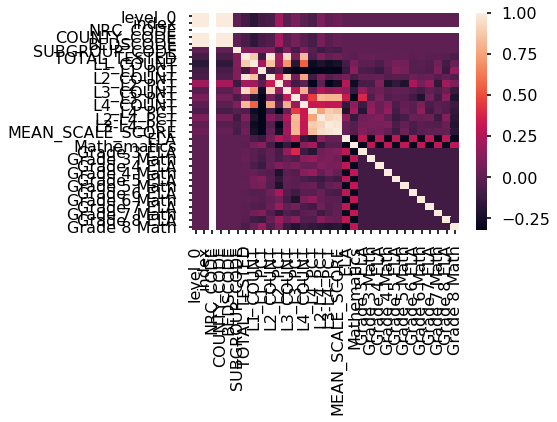

In [73]:
corr_mat=nyc_counties_subframe.corr()
sns.set_context("poster")
sns.heatmap(corr_mat, 
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values,robust=True)

In [74]:
nyc_counties_subframe.columns

Index(['level_0', 'index', 'SY_END_DATE', 'NRC_CODE', 'NRC_DESC',
       'COUNTY_CODE', 'COUNTY_DESC', 'BEDSCODE', 'NAME', 'ITEM_SUBJECT_AREA',
       'ITEM_DESC', 'SUBGROUP_CODE', 'SUBGROUP_NAME', 'TOTAL_TESTED',
       'L1_COUNT', 'L1_PCT', 'L2_COUNT', 'L2_PCT', 'L3_COUNT', 'L3_PCT',
       'L4_COUNT', 'L4_PCT', 'L2-L4_PCT', 'L3-L4_PCT', 'MEAN_SCALE_SCORE',
       'ELA', 'Mathematics', 'Grade 3 ELA', 'Grade 3 Math', 'Grade 4 ELA',
       'Grade 4 Math', 'Grade 5 ELA', 'Grade 5 Math', 'Grade 6 ELA',
       'Grade 6 Math', 'Grade 7 ELA', 'Grade 7 Math', 'Grade 8 ELA',
       'Grade 8 Math'],
      dtype='object')

In [75]:
os.system('say "your computer has not melted"')

0

In [76]:
nyc_others_df.shape

(121682, 39)

In [77]:
pd.options.display.max_columns=39
nyc_others_df.head()

,level_0,index,SY_END_DATE,NRC_CODE,NRC_DESC,COUNTY_CODE,COUNTY_DESC,BEDSCODE,NAME,ITEM_SUBJECT_AREA,ITEM_DESC,SUBGROUP_CODE,SUBGROUP_NAME,TOTAL_TESTED,L1_COUNT,L1_PCT,L2_COUNT,L2_PCT,L3_COUNT,L3_PCT,L4_COUNT,L4_PCT,L2-L4_PCT,L3-L4_PCT,MEAN_SCALE_SCORE,ELA,Mathematics,Grade 3 ELA,Grade 3 Math,Grade 4 ELA,Grade 4 Math,Grade 5 ELA,Grade 5 Math,Grade 6 ELA,Grade 6 Math,Grade 7 ELA,Grade 7 Math,Grade 8 ELA,Grade 8 Math
0,384,147750,06/30/2016,1.0,NYC,31.0,NEW YORK,310100010015,PS 15 ROBERTO CLEMENTE,ELA,Grade 3 ELA,1,All Students,20.0,10.0,50.0,6.0,30.0,4.0,20.0,0.0,0.0,50.0,20.0,293.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,385,147751,06/30/2016,1.0,NYC,31.0,NEW YORK,310100010015,PS 15 ROBERTO CLEMENTE,ELA,Grade 3 ELA,2,Female,15.0,7.0,47.0,4.0,27.0,4.0,27.0,0.0,0.0,53.0,27.0,293.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,386,147752,06/30/2016,1.0,NYC,31.0,NEW YORK,310100010015,PS 15 ROBERTO CLEMENTE,ELA,Grade 3 ELA,3,Male,5.0,3.0,60.0,2.0,40.0,0.0,0.0,0.0,0.0,40.0,0.0,290.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,387,147753,06/30/2016,1.0,NYC,31.0,NEW YORK,310100010015,PS 15 ROBERTO CLEMENTE,ELA,Grade 3 ELA,5,Black or African American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,388,147754,06/30/2016,1.0,NYC,31.0,NEW YORK,310100010015,PS 15 ROBERTO CLEMENTE,ELA,Grade 3 ELA,6,Hispanic or Latino,13.0,7.0,54.0,4.0,31.0,2.0,15.0,0.0,0.0,46.0,15.0,291.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [78]:
demo_cats=nyc_df['SUBGROUP_NAME'].unique()
to_columns=['School Name','Test Type']
for i in range(len(demo_cats)):
    to_columns.append(demo_cats[i])
print(to_columns)
nyc_schools_transformed=pd.DataFrame(columns=to_columns)

['School Name', 'Test Type', 'All Students', 'Female', 'Male', 'American Indian or Alaska Native', 'Black or African American', 'Hispanic or Latino', 'Asian or Pacific Islander', 'White', 'Multiracial', 'General Education Students', 'Students with Disabilities', 'Not Limited English Proficient', 'Limited English Proficient', 'Economically Disadvantaged', 'Not Economically Disadvantaged', 'Not Migrant']


In [79]:
nyc_schools_transformed.columns

Index(['School Name', 'Test Type', 'All Students', 'Female', 'Male',
       'American Indian or Alaska Native', 'Black or African American',
       'Hispanic or Latino', 'Asian or Pacific Islander', 'White',
       'Multiracial', 'General Education Students',
       'Students with Disabilities', 'Not Limited English Proficient',
       'Limited English Proficient', 'Economically Disadvantaged',
       'Not Economically Disadvantaged', 'Not Migrant'],
      dtype='object')

In [80]:
nyc_others_df['NAME'].value_counts()

PS 89                                               266
PS 212                                              244
PS 150                                              206
PS 71 ROSE E SCALA                                  186
VOICE CHARTER SCHOOL OF NEW YORK                    184
PS 184 SHUANG WEN                                   182
PS 206 JOSEPH F LAMB                                182
PS/IS 187 HUDSON CLIFFS                             182
PS/IS 104 FORT HAMILTON SCHOOL (THE)                181
PS/IS 295                                           181
PS 83 DONALD HERTZ                                  180
PS 102 BAYVIEW                                      180
PS/MS 138 SUNRISE                                   180
PS 124 OSMOND A CHURCH                              180
PS/MS 194                                           180
STATEN ISLAND SCHOOL OF CIVIC LEADERSHIP            179
PS 99 ISAAC ASIMOV                                  178
PS 183 DR RICHARD R GREEN                       

I had hoped this would lead me to a list of how many rows each school had, but alas it looks like I'm going to have to brute force this as well.

In [81]:
school_names=nyc_others_df['NAME'].unique()
school_been_seen=np.zeros(len(school_names))
school_counts=np.zeros(len(school_names))

In [82]:
# %%time
# for j in range(nyc_others_df.shape[0]):
#     for k in range(len(school_names)):
#         if nyc_others_df['NAME'][j]==school_names[k]:
#             if school_been_seen[k]==0:
#                 school_been_seen[k]=1
#             school_counts[k]+=1

CPU times: user 29min 20s, sys: 3.09 s, total: 29min 23s
Wall time: 29min 25s


In [83]:
os.system('say "thirty minute cell has run"')

0

In [84]:
school_counts

array([ 76.,  86.,  90., ...,  91.,  86.,  84.])

In [85]:
school_names

array(['PS 15 ROBERTO CLEMENTE', 'PS 19 ASHER LEVY', 'PS 20 ANNA SILVER',
       ..., 'JOHN W LAVELLE PREPARATORY CHARTER SCHOOL',
       'STATEN ISLAND COMMUNITY CHARTER SCHOOL',
       'NEW WORLD PREPARATORY CHARTER SCHOOL'], dtype=object)

In [86]:
nyc_others_df.head()

,level_0,index,SY_END_DATE,NRC_CODE,NRC_DESC,COUNTY_CODE,COUNTY_DESC,BEDSCODE,NAME,ITEM_SUBJECT_AREA,ITEM_DESC,SUBGROUP_CODE,SUBGROUP_NAME,TOTAL_TESTED,L1_COUNT,L1_PCT,L2_COUNT,L2_PCT,L3_COUNT,L3_PCT,L4_COUNT,L4_PCT,L2-L4_PCT,L3-L4_PCT,MEAN_SCALE_SCORE,ELA,Mathematics,Grade 3 ELA,Grade 3 Math,Grade 4 ELA,Grade 4 Math,Grade 5 ELA,Grade 5 Math,Grade 6 ELA,Grade 6 Math,Grade 7 ELA,Grade 7 Math,Grade 8 ELA,Grade 8 Math
0,384,147750,06/30/2016,1.0,NYC,31.0,NEW YORK,310100010015,PS 15 ROBERTO CLEMENTE,ELA,Grade 3 ELA,1,All Students,20.0,10.0,50.0,6.0,30.0,4.0,20.0,0.0,0.0,50.0,20.0,293.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,385,147751,06/30/2016,1.0,NYC,31.0,NEW YORK,310100010015,PS 15 ROBERTO CLEMENTE,ELA,Grade 3 ELA,2,Female,15.0,7.0,47.0,4.0,27.0,4.0,27.0,0.0,0.0,53.0,27.0,293.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,386,147752,06/30/2016,1.0,NYC,31.0,NEW YORK,310100010015,PS 15 ROBERTO CLEMENTE,ELA,Grade 3 ELA,3,Male,5.0,3.0,60.0,2.0,40.0,0.0,0.0,0.0,0.0,40.0,0.0,290.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,387,147753,06/30/2016,1.0,NYC,31.0,NEW YORK,310100010015,PS 15 ROBERTO CLEMENTE,ELA,Grade 3 ELA,5,Black or African American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,388,147754,06/30/2016,1.0,NYC,31.0,NEW YORK,310100010015,PS 15 ROBERTO CLEMENTE,ELA,Grade 3 ELA,6,Hispanic or Latino,13.0,7.0,54.0,4.0,31.0,2.0,15.0,0.0,0.0,46.0,15.0,291.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [87]:
pd.options.display.max_rows = 200

In [88]:
nyc_others_df.groupby('NAME')['NRC_CODE'].count().values

array([56, 72, 57, ..., 86, 78, 82])

GroupBy Attempt

In [89]:
nyc_others_df.groupby(['NAME','ITEM_DESC'])['MEAN_SCALE_SCORE'].mean()

NAME                                                             ITEM_DESC   
30TH AVENUE SCHOOL (THE)                                         Grade 6 ELA     348.777778
                                                                 Grade 6 Math    358.888889
                                                                 Grade 7 ELA     344.375000
                                                                 Grade 7 Math    347.500000
47 AMERICAN SIGN LANGUAGE AND ENGLISH LOWER SCHOOL (THE)         Grade 3 ELA     323.000000
                                                                 Grade 3 Math    296.800000
                                                                 Grade 4 ELA            NaN
                                                                 Grade 4 Math           NaN
                                                                 Grade 5 ELA     294.000000
                                                                 Grade 5 Math    289.000000
  

In [90]:
nyc_others_df.shape

(121682, 39)

In [91]:
#%%time
#nyc_schools_pivot=nyc_others_df.pivot(columns='NAME')
#nyc_schools_pivot.head()

In [93]:
os.system('say "finished"')

0

In [96]:
nyc_df.columns

Index(['index', 'SY_END_DATE', 'NRC_CODE', 'NRC_DESC', 'COUNTY_CODE',
       'COUNTY_DESC', 'BEDSCODE', 'NAME', 'ITEM_SUBJECT_AREA', 'ITEM_DESC',
       'SUBGROUP_CODE', 'SUBGROUP_NAME', 'TOTAL_TESTED', 'L1_COUNT', 'L1_PCT',
       'L2_COUNT', 'L2_PCT', 'L3_COUNT', 'L3_PCT', 'L4_COUNT', 'L4_PCT',
       'L2-L4_PCT', 'L3-L4_PCT', 'MEAN_SCALE_SCORE', 'ELA', 'Mathematics',
       'Grade 3 ELA', 'Grade 3 Math', 'Grade 4 ELA', 'Grade 4 Math',
       'Grade 5 ELA', 'Grade 5 Math', 'Grade 6 ELA', 'Grade 6 Math',
       'Grade 7 ELA', 'Grade 7 Math', 'Grade 8 ELA', 'Grade 8 Math'],
      dtype='object')

In [100]:
nimble_columns=['NAME','ITEM_DESC','MEAN_SCALE_SCORE']
nyc_nimble_df=nyc_others_df[nimble_columns][nyc_others_df['SUBGROUP_NAME']=='All Students']
nyc_nimble_df.head()

,NAME,ITEM_DESC,MEAN_SCALE_SCORE
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,293.0
13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,275.0
26,PS 15 ROBERTO CLEMENTE,Grade 4 ELA,298.0
39,PS 15 ROBERTO CLEMENTE,Grade 4 Math,304.0
52,PS 15 ROBERTO CLEMENTE,Grade 5 ELA,288.0


In [101]:
nyc_nimble_df.shape

(8760, 3)

In [133]:
nimble_columns=['NAME','ITEM_DESC','SUBGROUP_NAME','MEAN_SCALE_SCORE']
nyc_nimble_df=nyc_others_df[nimble_columns][(nyc_others_df['SUBGROUP_NAME'] == 'All Students') | (nyc_others_df['SUBGROUP_NAME'] == 'Female') | (nyc_others_df['SUBGROUP_NAME'] == 'Male')]
nyc_nimble_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0
1,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Female,293.0
2,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Male,290.0
13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0
14,PS 15 ROBERTO CLEMENTE,Grade 3 Math,Female,274.0


In [134]:
nyc_nimble_df.shape

(26098, 4)

In [135]:
nyc_nimble_df.reset_index(inplace=True)

In [136]:
nyc_nimble_df.head()

,index,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE
0,0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0
1,1,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Female,293.0
2,2,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Male,290.0
3,13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0
4,14,PS 15 ROBERTO CLEMENTE,Grade 3 Math,Female,274.0


Modeling on gender

In [137]:
nyc_nimble_dummies=pd.get_dummies(nyc_nimble_df['SUBGROUP_NAME'],drop_first=True)
nyc_nimble_df=pd.concat([nyc_nimble_df,nyc_nimble_dummies],axis=1)
nyc_nimble_df.head()

,index,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE,Female,Male
0,0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0,0,0
1,1,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Female,293.0,1,0
2,2,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Male,290.0,0,1
3,13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0,0,0
4,14,PS 15 ROBERTO CLEMENTE,Grade 3 Math,Female,274.0,1,0


In [138]:
nyc_nimble_df.shape

(26098, 7)

In [139]:
nyc_nimble_df.dropna(inplace=True)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [141]:
lr=LinearRegression()

In [142]:
X = nyc_nimble_df[['Female','Male']] # predictors
y = nyc_nimble_df['MEAN_SCALE_SCORE'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .33)

lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.012242043210481279

Modeling on general vs special ed

In [119]:
swift_columns=['NAME','ITEM_DESC','SUBGROUP_NAME','MEAN_SCALE_SCORE']
nyc_swift_df=nyc_others_df[swift_columns][(nyc_others_df['SUBGROUP_NAME'] == 'All Students') | (nyc_others_df['SUBGROUP_NAME'] == 'General Education Students') | (nyc_others_df['SUBGROUP_NAME'] == 'Students with Disabilities')]
nyc_swift_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0
6,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,General Education Students,304.0
7,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Students with Disabilities,278.0
13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0
19,PS 15 ROBERTO CLEMENTE,Grade 3 Math,General Education Students,291.0


In [120]:
nyc_swift_dummies=pd.get_dummies(nyc_swift_df['SUBGROUP_NAME'],drop_first=True)
nyc_swift_df=pd.concat([nyc_swift_df,nyc_swift_dummies],axis=1)
nyc_swift_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE,General Education Students,Students with Disabilities
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0,0,0
6,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,General Education Students,304.0,1,0
7,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Students with Disabilities,278.0,0,1
13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0,0,0
19,PS 15 ROBERTO CLEMENTE,Grade 3 Math,General Education Students,291.0,1,0


In [121]:
nyc_swift_df.dropna(inplace=True)

In [123]:
lr2=LinearRegression()

X2 = nyc_swift_df[['General Education Students','Students with Disabilities']] # predictors
y2 = nyc_swift_df['MEAN_SCALE_SCORE'] # target variable

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size= .33)

lr2.fit(X_train2,y_train2)
lr2.score(X_test2,y_test2)

0.30604172486516779

Modeling on Economic Status

In [124]:
quick_columns=['NAME','ITEM_DESC','SUBGROUP_NAME','MEAN_SCALE_SCORE']
nyc_quick_df=nyc_others_df[quick_columns][(nyc_others_df['SUBGROUP_NAME'] == 'All Students') | (nyc_others_df['SUBGROUP_NAME'] == 'Economically Disadvantaged') | (nyc_others_df['SUBGROUP_NAME'] == 'Not Economically Disadvantaged')]
nyc_quick_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0
10,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Economically Disadvantaged,NaN
11,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Not Economically Disadvantaged,NaN
13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0
23,PS 15 ROBERTO CLEMENTE,Grade 3 Math,Economically Disadvantaged,NaN


In [125]:
nyc_quick_dummies=pd.get_dummies(nyc_quick_df['SUBGROUP_NAME'],drop_first=True)
nyc_quick_df=pd.concat([nyc_quick_df,nyc_quick_dummies],axis=1)
nyc_quick_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE,Economically Disadvantaged,Not Economically Disadvantaged
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0,0,0
10,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Economically Disadvantaged,NaN,1,0
11,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Not Economically Disadvantaged,NaN,0,1
13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0,0,0
23,PS 15 ROBERTO CLEMENTE,Grade 3 Math,Economically Disadvantaged,NaN,1,0


In [126]:
nyc_quick_df.dropna(inplace=True)

In [127]:
lr3=LinearRegression()

X3 = nyc_quick_df[['Economically Disadvantaged','Not Economically Disadvantaged']] # predictors
y3 = nyc_quick_df['MEAN_SCALE_SCORE'] # target variable

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, test_size= .33)

lr3.fit(X_train3,y_train3)
lr3.score(X_test3,y_test3)

0.033983074681827818

Modeling on ESL status

In [128]:
small_columns=['NAME','ITEM_DESC','SUBGROUP_NAME','MEAN_SCALE_SCORE']
nyc_small_df=nyc_others_df[small_columns][(nyc_others_df['SUBGROUP_NAME'] == 'All Students') | (nyc_others_df['SUBGROUP_NAME'] == 'Not Limited English Proficient') | (nyc_others_df['SUBGROUP_NAME'] == 'Limited English Proficient')]
nyc_small_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0
8,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Not Limited English Proficient,NaN
9,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Limited English Proficient,NaN
13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0
21,PS 15 ROBERTO CLEMENTE,Grade 3 Math,Not Limited English Proficient,NaN


In [129]:
nyc_small_dummies=pd.get_dummies(nyc_small_df['SUBGROUP_NAME'],drop_first=True)
nyc_small_df=pd.concat([nyc_small_df,nyc_small_dummies],axis=1)
nyc_small_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE,Limited English Proficient,Not Limited English Proficient
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0,0,0
8,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Not Limited English Proficient,NaN,0,1
9,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Limited English Proficient,NaN,1,0
13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0,0,0
21,PS 15 ROBERTO CLEMENTE,Grade 3 Math,Not Limited English Proficient,NaN,0,1


In [130]:
nyc_small_df.dropna(inplace=True)

In [132]:
lr4=LinearRegression()

X4 = nyc_small_df[['Not Limited English Proficient','Limited English Proficient']] # predictors
y4 = nyc_small_df['MEAN_SCALE_SCORE'] # target variable

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4, test_size= .33)

lr4.fit(X_train4,y_train4)
lr4.score(X_test4,y_test4)

0.30101974024496236

Modeling on the best 2 opposing pairs at once

In [143]:
show_columns=['NAME','ITEM_DESC','SUBGROUP_NAME','MEAN_SCALE_SCORE']
nyc_show_df=nyc_others_df[show_columns][(nyc_others_df['SUBGROUP_NAME'] == 'All Students') | (nyc_others_df['SUBGROUP_NAME'] == 'Not Limited English Proficient') | (nyc_others_df['SUBGROUP_NAME'] == 'Limited English Proficient') | (nyc_others_df['SUBGROUP_NAME'] == 'Economically Disadvantaged') | (nyc_others_df['SUBGROUP_NAME'] == 'Not Economically Disadvantaged')]
nyc_show_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0
8,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Not Limited English Proficient,NaN
9,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Limited English Proficient,NaN
10,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Economically Disadvantaged,NaN
11,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Not Economically Disadvantaged,NaN


In [144]:
nyc_show_dummies=pd.get_dummies(nyc_show_df['SUBGROUP_NAME'],drop_first=True)
nyc_show_df=pd.concat([nyc_show_df,nyc_show_dummies],axis=1)
nyc_show_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE,Economically Disadvantaged,Limited English Proficient,Not Economically Disadvantaged,Not Limited English Proficient
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0,0,0,0,0
8,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Not Limited English Proficient,NaN,0,0,0,1
9,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Limited English Proficient,NaN,0,1,0,0
10,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Economically Disadvantaged,NaN,1,0,0,0
11,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Not Economically Disadvantaged,NaN,0,0,1,0


In [145]:
nyc_show_df.dropna(inplace=True)

In [152]:
lr5=LinearRegression()

X5 = nyc_show_df[['Not Limited English Proficient','Limited English Proficient','Economically Disadvantaged','Not Economically Disadvantaged']] # predictors
y5 = nyc_show_df['MEAN_SCALE_SCORE'] # target variable

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5, test_size= .33)

lr5.fit(X_train5,y_train5)
lr5.score(X_test5,y_test5)

0.22659397790443048

In [153]:
print(lr2.score(X_train2,y_train2), lr4.score(X_train4,y_train4), lr5.score(X_train5,y_train5))

0.304994924111 0.294442150413 0.233888807665


Modeling on race

In [159]:
demo_list=[]
for i in range(3,9):
    demo_list.append(demo_cats[i])
demo_list

['American Indian or Alaska Native',
 'Black or African American',
 'Hispanic or Latino',
 'Asian or Pacific Islander',
 'White',
 'Multiracial']

In [149]:
hotbutton_columns=['NAME','ITEM_DESC','SUBGROUP_NAME','MEAN_SCALE_SCORE']
nyc_hotbutton_df=nyc_others_df[show_columns][(nyc_others_df['SUBGROUP_NAME'] == 'All Students') | (nyc_others_df['SUBGROUP_NAME'] == 'American Indian or Alaska Native') | (nyc_others_df['SUBGROUP_NAME'] == 'Black or African American') | (nyc_others_df['SUBGROUP_NAME'] == 'Hispanic or Latino') | (nyc_others_df['SUBGROUP_NAME'] == 'Asian or Pacific Islander') | (nyc_others_df['SUBGROUP_NAME'] == 'White') | (nyc_others_df['SUBGROUP_NAME'] == 'Multiracial')]
nyc_hotbutton_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0
3,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Black or African American,NaN
4,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Hispanic or Latino,291.0
5,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Asian or Pacific Islander,NaN
13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0


In [150]:
nyc_hotbutton_dummies=pd.get_dummies(nyc_hotbutton_df['SUBGROUP_NAME'],drop_first=True)
nyc_hotbutton_df=pd.concat([nyc_hotbutton_df,nyc_hotbutton_dummies],axis=1)
nyc_hotbutton_df.head()

,NAME,ITEM_DESC,SUBGROUP_NAME,MEAN_SCALE_SCORE,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,Hispanic or Latino,Multiracial,White
0,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,All Students,293.0,0,0,0,0,0,0
3,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Black or African American,NaN,0,0,1,0,0,0
4,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Hispanic or Latino,291.0,0,0,0,1,0,0
5,PS 15 ROBERTO CLEMENTE,Grade 3 ELA,Asian or Pacific Islander,NaN,0,1,0,0,0,0
13,PS 15 ROBERTO CLEMENTE,Grade 3 Math,All Students,275.0,0,0,0,0,0,0


In [151]:
nyc_hotbutton_df.dropna(inplace=True)

In [160]:
lr6=LinearRegression()

X6 = nyc_hotbutton_df[demo_list] # predictors
y6 = nyc_hotbutton_df['MEAN_SCALE_SCORE'] # target variable

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6, test_size= .33)

lr6.fit(X_train6,y_train6)
print(lr6.score(X_train6,y_train6),lr6.score(X_test6,y_test6))

0.206378108031 0.211809604175


Making a plot for the sheer unadulterated hell of it

In [165]:
train_scores=[lr.score(X_train,y_train),lr2.score(X_train2,y_train2),lr3.score(X_train3,y_train3),
             lr4.score(X_train4,y_train4),lr5.score(X_train5,y_train5),lr6.score(X_train6,y_train6)]
test_scores=[lr.score(X_test,y_test),lr2.score(X_test2,y_test2),lr3.score(X_test3,y_test3),lr4.score(X_test4,y_test4),
            lr5.score(X_test5,y_test5),lr6.score(X_test6,y_test6)]
score_labels=['Sex','GenEd/SpEd','EconStat','ESL','GE/SE+ESL','Race']

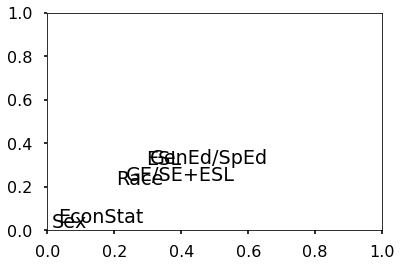

In [173]:
for label, x, y in zip(score_labels, train_scores, test_scores):
    plt.annotate(label,xy=(x, y))

plt.show()

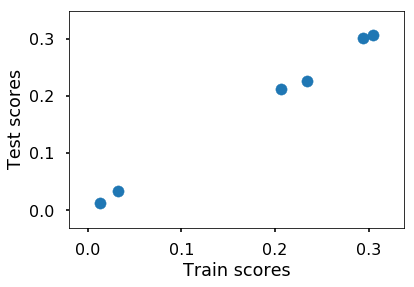

In [163]:
plt.scatter(train_scores,test_scores)
plt.xlabel('Train scores')
plt.ylabel('Test scores')

In [164]:
print(train_scores)
print(test_scores)

[0.013322175674864822, 0.3049949241108566, 0.032114438202192952, 0.29444215041316713, 0.23388880766528952, 0.20637810803115564]
[0.012242043210481279, 0.30604172486516779, 0.033983074681827818, 0.30101974024496236, 0.22659397790443048, 0.21180960417455963]
